In [2]:
# per vedere la forza g dobbiamo avere la forza G, il peso macchina, l'accelerazione o decelerazione

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']
c:\Users\dilau\Desktop\TeamProjF1\FASTF1\.venv\Lib\site-packa

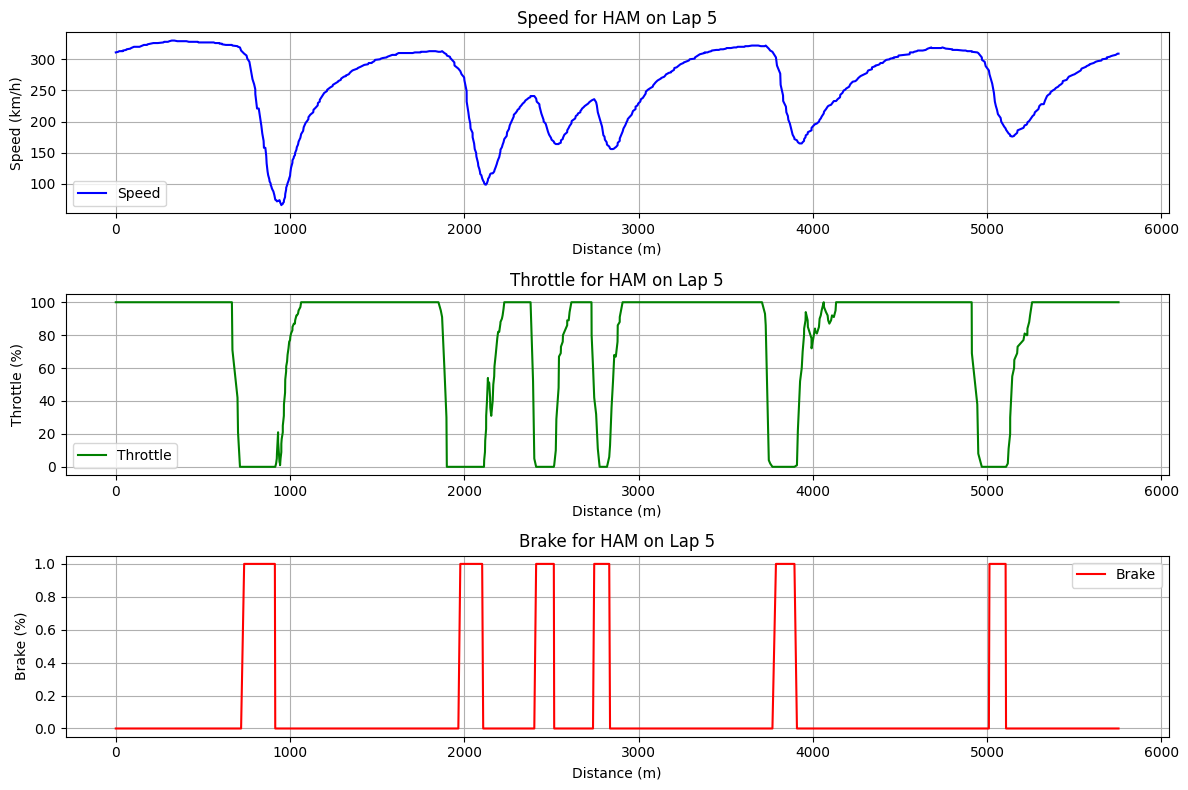

Steering data not available for this lap.


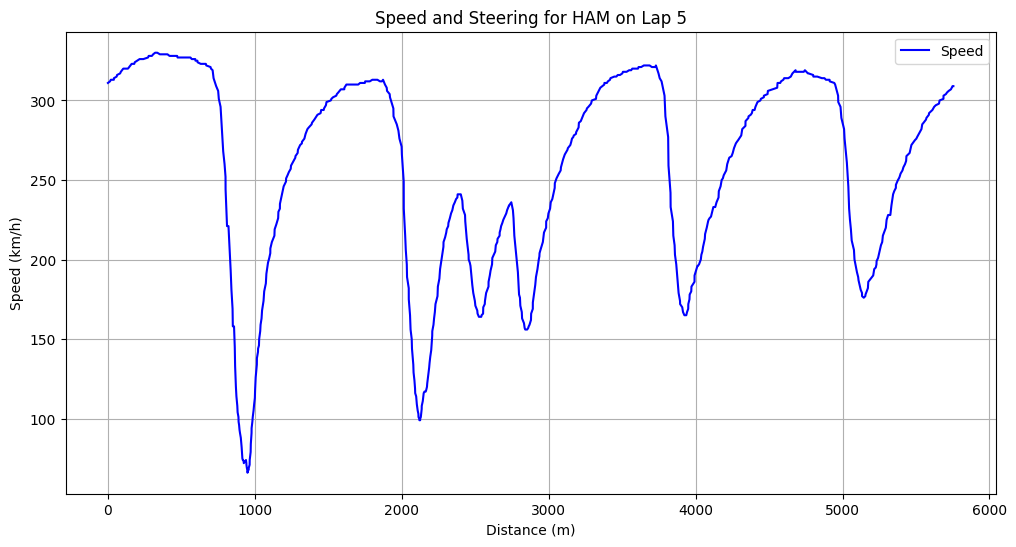

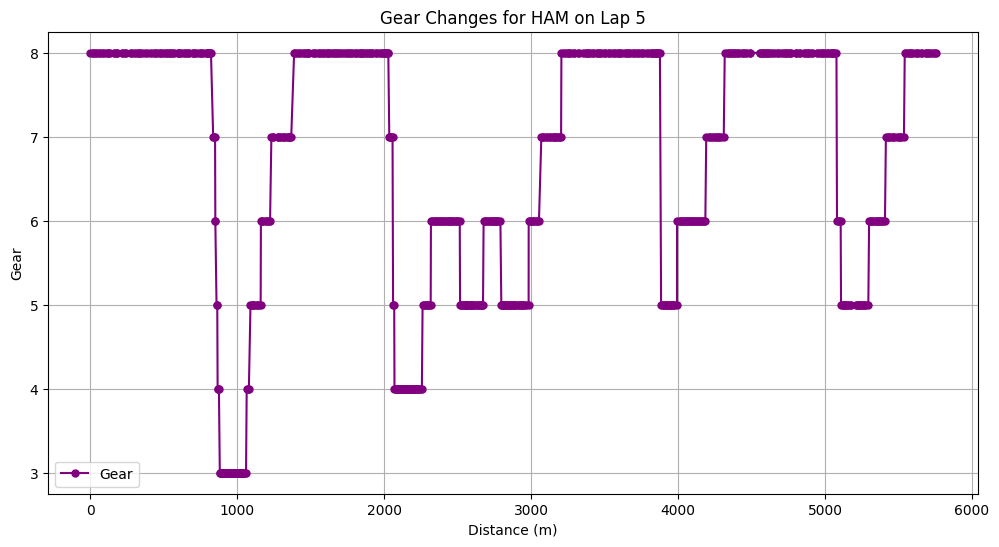

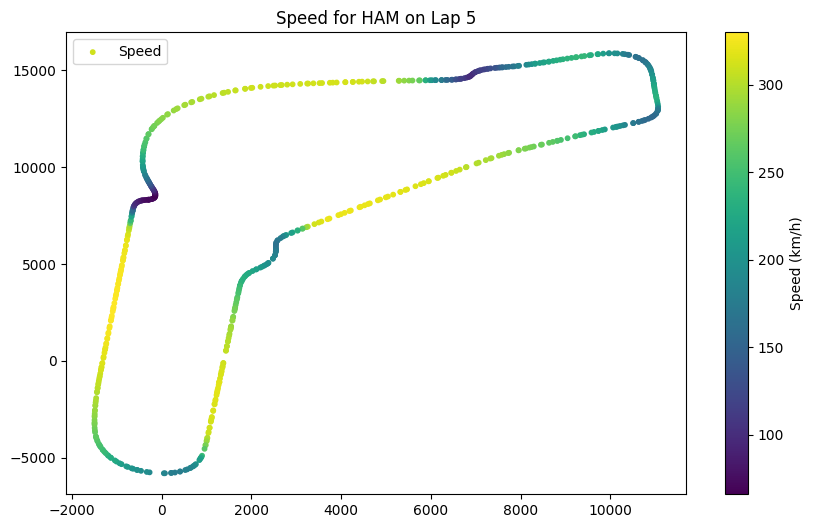

In [3]:
import fastf1
import matplotlib.pyplot as plt

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Define the session details
year = 2023
gran_prix = "Monza"
sessionG = 'R'  # Race session
driver = "HAM"  # Driver to analyze
lap_number = 5  # Lap to analyze

# Load the race session
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Get the lap for the specified driver and lap number
lap = session.laps.pick_driver(driver).pick_lap(lap_number).iloc[0]

# Get telemetry data for the lap
telemetry = lap.get_telemetry()

# Plot 1: Speed, Throttle, and Brake over distance
plt.figure(figsize=(12, 8))

# Plot speed
plt.subplot(3, 1, 1)
plt.plot(telemetry["Distance"], telemetry["Speed"], label="Speed", color="blue")
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.title(f"Speed for {driver} on Lap {lap_number}")
plt.legend()
plt.grid()

# Plot throttle
plt.subplot(3, 1, 2)
plt.plot(telemetry["Distance"], telemetry["Throttle"], label="Throttle", color="green")
plt.xlabel("Distance (m)")
plt.ylabel("Throttle (%)")
plt.title(f"Throttle for {driver} on Lap {lap_number}")
plt.legend()
plt.grid()

# Plot brake
plt.subplot(3, 1, 3)
plt.plot(telemetry["Distance"], telemetry["Brake"], label="Brake", color="red")
plt.xlabel("Distance (m)")
plt.ylabel("Brake (%)")
plt.title(f"Brake for {driver} on Lap {lap_number}")
plt.legend()
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Plot 2: Cornering Performance (Speed and Steering)
plt.figure(figsize=(12, 6))

# Plot speed
plt.plot(telemetry["Distance"], telemetry["Speed"], label="Speed", color="blue")
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.title(f"Speed and Steering for {driver} on Lap {lap_number}")
plt.legend()
plt.grid()

# Plot steering on a secondary y-axis if the column exists
if "Steering" in telemetry.columns:
    ax2 = plt.twinx()
    ax2.plot(telemetry["Distance"], telemetry["Steering"], label="Steering", color="orange", linestyle="--")
    ax2.set_ylabel("Steering Angle (degrees)")
    ax2.legend(loc="upper right")
else:
    print("Steering data not available for this lap.")

plt.show()

# Plot 3: Gear Changes
plt.figure(figsize=(12, 6))
plt.plot(telemetry["Distance"], telemetry["nGear"], label="Gear", color="purple", marker="o", markersize=5)
plt.xlabel("Distance (m)")
plt.ylabel("Gear")
plt.title(f"Gear Changes for {driver} on Lap {lap_number}")
plt.legend()
plt.grid()
plt.show()

# Plot 4: Track Layout Visualization with Speed
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the driver's trajectory with speed as color
sc = ax.scatter(telemetry["X"], telemetry["Y"], c=telemetry["Speed"], cmap="viridis", label="Speed", s=10)
plt.colorbar(sc, label="Speed (km/h)")

plt.title(f"Speed for {driver} on Lap {lap_number}")
plt.legend()
plt.show()

In [4]:
import fastf1 as ff1
import numpy as np
import pandas as pd

def timedelta_to_seconds(td):
    return td.total_seconds()

session = ff1.get_session(2022, 'Imola', 'R')
session.load()

def get_data(driver, session):
    session_driver = session.laps.pick_driver(driver)
    driver_lap_number = session_driver['LapNumber'] # Driver's lap
    driver_sector1_time = (session_driver['Sector1Time'] / np.timedelta64(1, 's')).astype(float) # Sector 1 recorded time
    driver_sector2_time = (session_driver['Sector2Time'] / np.timedelta64(1, 's')).astype(float) # Sector 2 recorded time
    driver_sector3_time = (session_driver['Sector3Time'] / np.timedelta64(1, 's')).astype(float) # Sector 3 recorded time
    driver_lap_time = session_driver['LapTime'].apply(timedelta_to_seconds)
    weather_rainfall = session.laps.get_weather_data()['Rainfall'] #Shows if there is rainfall
    weather_rainfall = np.where(weather_rainfall == True, 1, 0)
    weather_track_temperature = session.laps.get_weather_data()['TrackTemp'] # Track temperature [Celsius]
    driver_list = [driver] * len(driver_lap_number)
    grand_prix_list = [session.event['Location']] * len(driver_lap_number)
    compound = session_driver['Compound']
    list_of_tuples = list(zip(driver_list, grand_prix_list,driver_lap_number, driver_sector1_time, driver_sector2_time,driver_sector3_time, driver_lap_time, weather_rainfall,weather_track_temperature, compound))
    df = pd.DataFrame(list_of_tuples, columns = ['Driver', 'Race', 'Lap', 'Sector 1 Time', 'Sector 2 Time', 'Sector 3 Time', 'LapTime', 'Rainfall', 'Track Temp', 'Compound'])
    return df

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.4.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO

In [5]:
# Define dict_data with necessary mappings
dict_data = {
    'drivers': {
        # Add driver mappings here
    },
    'races': {
        # Add race mappings here
    },
    'compound': {
        # Add compound mappings here
    }
}

def load_dataset(year_list):
    driver_race_data_list = []
    driver_encoding = {}
    race_encoding = {}
    compound_encoding = {}
    for year in year_list:
        # Get the race list for the input year
        race_list = get_race_list(year)
        driver_race_data = {}
        for race in race_list:
            session = ff1.get_session(year, race, 'R')
            session.load()
            driver_list = pd.unique(session.laps['Driver'])
            for driver in driver_list:
                session_driver = session.laps.pick_driver(driver)
                # Load all the driver's information for the current
                session
                data = get_data(driver, session)
                # Encode and replace driver data.
                driver_encoding[driver] = dict_data['drivers'].get(driver, -1)
                driver_encoded = driver_encoding[driver]
                data['Driver'] = data['Driver'].replace(driver, driver_encoded)
                 # Encode and replace race data.
                race_encoding[race] = dict_data['races'].get(race, -1)
                race_encoded = race_encoding[race]
                data['Race'] = data['Race'].replace(race, race_encoded)
                # Compound's driver data from fastf1 library.
                compound_list = session_driver['Compound']
                for compound in compound_list:
                    # Encode and replace compound data.
                    compound_encoding[compound] = dict_data['compound'].get(compound, -1)
                    compound_encoded = compound_encoding[compound]
                    data['Compound'] = data['Compound'].replace(compound, compound_encoded)
                    driver_race_data[(driver_encoded, race_encoded)] = data.values
                    # Add rows until lap is equal to 78 (Monaco's grand prix lap).
                    while(driver_race_data[(driver_encoded, race_encoded)].shape[0] < 78):
                        lap = driver_race_data[(driver_encoded, race_encoded)].shape[0] + 1
                        new_row = np.array([[driver_encoded, race_encoded, lap, -1, -1, -1, -1, -1, -1, -1]])
                        driver_race_data[(driver_encoded, race_encoded)] = np.vstack((driver_race_data[(driver_encoded, race_encoded)], new_row))

        # Replace NaN values with -1
        for key, value in driver_race_data.items():
            driver_race_data[key] = np.nan_to_num(value, nan=-1)
        
        driver_race_data_list.append(driver_race_data)

    return driver_race_data_list

In [6]:
def get_race_list(year):
    grand_prix_list = ff1.get_event_schedule(year)
    race_list = []

    for race in grand_prix_list['Location']:
        race_list.append(race)
    
    # Removing Pre-season test sessions.
    if year == 2022:
        race_list.remove('Spain')
        race_list.remove('Bahrain')
    elif year == 2021:
        race_list.remove('Sakhir')
    elif year == 2020:
        race_list.remove('Montmelo')
        race_list.remove('Montmelo')
                         
    return race_list

In [7]:
def generate_dataset(year_list):
    driver_race_data_list = load_dataset(year_list)
    # Determine the shape of the 3D numpy array
    m, n = next(iter(driver_race_data_list[0].values())).shape
    N = sum(len(d) for d in driver_race_data_list)
    full_dataset = np.zeros((N, m, n))
    # Convert each dictionary to a 3D numpy array and stack them
    i = 0
    for dataset in driver_race_data_list:
        for key, value in dataset.items():
            full_dataset[i] = value
            i += 1
    # Save the full dataset to a file
    np.save('ex1_data.csv', full_dataset)

    return full_dataset

In [8]:
generate_dataset([2024])

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

KeyboardInterrupt: 

c:\Users\dilau\Desktop\TeamProjF1\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\dilau\Desktop\TeamProjF1\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\dilau\Desktop\TeamProjF1\FASTF1\.venv\Lib\site-packages\fastf1\plotting\__init__.py:84: FutureWarning: COMPOUND_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"{name} is deprecated and will be removed in a future "


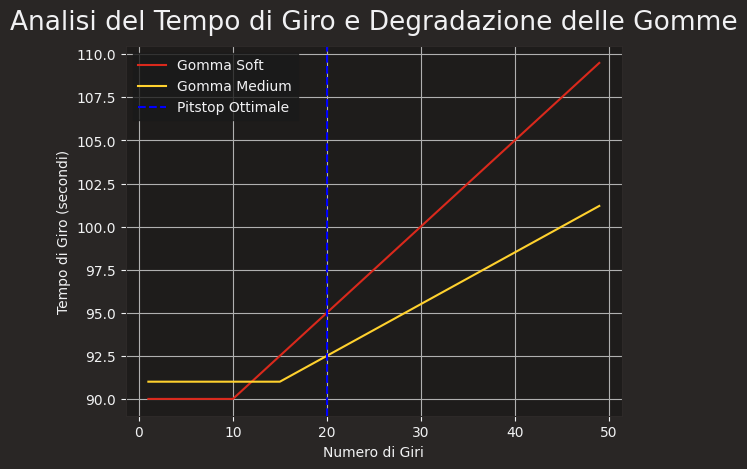

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import fastf1.plotting

# Define the lap numbers
giri = np.arange(1, 50)

# Simulate lap times for Soft and Medium tires
tempo_soft = 90 + 0.5 * np.maximum(0, giri - 10)  # Soft tires degrade faster
tempo_medium = 91 + 0.3 * np.maximum(0, giri - 15)  # Medium tires degrade slower

# Set up FastF1's Matplotlib style
fastf1.plotting.setup_mpl()

# Get the official compound colors
compound_colors = fastf1.plotting.COMPOUND_COLORS

# Plot the lap times with compound colors
plt.plot(giri, tempo_soft, label='Gomma Soft', color=compound_colors["SOFT"])
plt.plot(giri, tempo_medium, label='Gomma Medium', color=compound_colors["MEDIUM"])

# Add a vertical line for the optimal pit stop
plt.axvline(x=20, color='b', linestyle='--', label='Pitstop Ottimale')

# Add labels and title
plt.xlabel('Numero di Giri')
plt.ylabel('Tempo di Giro (secondi)')
plt.title('Analisi del Tempo di Giro e Degradazione delle Gomme')

# Add a legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [1]:
import pandas as pd
import fastf1 as ff1
from datetime import timedelta

# Configurazione della sessione
anno = 2024
gara = 'Monaco'
sessione = 'R'  # Race

# Carica la sessione
session = ff1.get_session(anno, gara, sessione)
session.load()

# Ottieni i dati meteo (Get weather data)
weather_data = session.weather_data

# Ottieni i dati del pilota (esempio: Verstappen) (Get driver data, example: Verstappen, but using HAM for Hamilton)
driver = 'LEC'
# Get all laps for the selected driver
driver_laps = session.laps.pick_drivers([driver])
# Get telemetry data for the driver and add distance information
driver_telemetry = driver_laps.get_car_data().add_distance()

# Ottieni informazioni sul circuito (Get circuit information)
circuito = session.event.Location  # Nome del circuito (Circuit name)

# Nota: FastF1 non fornisce direttamente la lunghezza del circuito, quindi usiamo una mappatura manuale
# (Note: FastF1 doesn't directly provide circuit length, so we use a manual mapping)
lunghezza_circuito = {
    'Monaco': 3337,  # Lunghezza del circuito di Monaco in metri (Monaco circuit length in meters)
    'Silverstone': 5891,  # Esempio per altri circuiti (Example for other circuits)
    'Monza': 5793,
    # Aggiungi altri circuiti qui (Add other circuits here)
}.get(circuito, 0)  # Returns 0 if circuit isn't in the dictionary

# Trovo i giri totali del pilota (Find the total laps in the session)
giri_totali = session.total_laps

# Trova la scuderia del pilota (Find the driver's team)
scuderia = driver_laps['Team'].iloc[0]  # Get the first team value from driver laps data

# Ottieni i dati di telemetria per tutti i piloti (Get telemetry data for all drivers)
all_drivers_telemetry = {}
for drv in session.drivers:  # Loop through all drivers in the session
    drv_laps = session.laps.pick_drivers([drv])  # Get laps for the current driver
    if not drv_laps.empty:  # Check if there are any laps for this driver
        all_drivers_telemetry[drv] = drv_laps.get_car_data().add_distance()  # Add telemetry with distance data to dictionary


# Crea un intervallo di timestamp ogni 0.5 secondi (Create timestamp intervals every 0.5 seconds)
start_time = timedelta(seconds=0)  # Start from 0 seconds
end_time = weather_data['Time'].max()  # Durata massima della sessione (Maximum duration of the session)
timestamp_intervals = pd.timedelta_range(start=start_time, end=end_time, freq='500L')  # 500 millisecondi (500 milliseconds interval)

# Crea un DataFrame vuoto con le nuove colonne (Create an empty DataFrame with specified columns)
df = pd.DataFrame(columns=[
    'Timestamp', 'Driver', 'Scuderia', 'Track_Temperature', 'Speed',
    'Anno', 'Circuito','Giri_Totali', 'Lunghezza_Circuito', 'Posizione','Giro_in_Corso','Distanza_dal_precedente',
    'Distanza_dal_successivo', 'metri_percorsi'#, 'tempo_gara', 'DRS', 'TireLife'
])  # Column names for tracking various metrics

# Itera sui timestamp e raccogli i dati (Iterate over timestamps and collect data)
for timestamp in timestamp_intervals:  # For each time point in our intervals

    # Trova la temperatura della pista più vicina nel tempo (Find the closest track temperature data point in time)
    nearest_weather_idx = (weather_data['Time'] - timestamp).abs().idxmin()  # Get index of closest weather data
    track_temperature = weather_data.loc[nearest_weather_idx, 'TrackTemp']  # Get the track temperature at that index

    # Trova la velocità del pilota più vicina nel tempo (Find the closest speed data point in time)
    nearest_telemetry_idx = (driver_telemetry['Time'] - timestamp).abs().idxmin()  # Get index of closest telemetry data
    speed = driver_telemetry.loc[nearest_telemetry_idx, 'Speed']  # Get the speed at that index

    # Trova la posizione del pilota più vicina nel tempo (Find the closest position data point in time)
    nearest_position_idx = (driver_laps['Time'] - timestamp).abs().idxmin()  # Get index of closest position data
    posizione = driver_laps.loc[nearest_position_idx, 'Position']  # Get the position at that index

    # Trova il giro in corso più vicino nel tempo (Find the closest current lap data point in time)
    nearest_lap_idx = (driver_laps['LapStartTime'] - timestamp).abs().idxmin()  # Get index of closest lap start time
    giro_in_corso = driver_laps.loc[nearest_lap_idx, 'LapNumber']  # Get the lap number at that index

    # Trova la distanza dal pilota precedente (Find the distance from the preceding driver)
    if posizione == 1:  # If the driver is in first position
        distanza_dal_precedente = 0  # Se è primo, la distanza è 0 (If first, distance is 0)
    else:
        # Trova il pilota precedente in classifica (Find the driver in the preceding position)
        pilota_precedente = None
        for drv, telemetry in all_drivers_telemetry.items():  # Iterate through all drivers' telemetry
            drv_position = session.laps.pick_drivers([drv])['Position'].iloc[0]  # Get position of the current driver
            if drv_position == (posizione - 1):  # If this driver is in the position ahead
                pilota_precedente = telemetry  # Store their telemetry
                break

        if pilota_precedente is not None:  # If preceding driver data was found
            # Trova la distanza tra il pilota e quello precedente (Find distance between this driver and the preceding one)
            nearest_prec_idx = (pilota_precedente['Time'] - timestamp).abs().idxmin()  # Get closest time point in preceding driver's data
            distanza_dal_precedente = driver_telemetry.loc[nearest_telemetry_idx, 'Distance'] - \
                                      pilota_precedente.loc[nearest_prec_idx, 'Distance']  # Calculate distance difference
        else:
            distanza_dal_precedente = 0  # Se non ci sono dati, usa 0 (If no data, use 0)

    # Trova la distanza dal pilota successivo (Find the distance from the next driver)
    if posizione == 20:  # If the driver is in last position
        distanza_dal_successivo = 0  # Se è ultimo, la distanza è 0 (If first, distance is 0)
    else:
        # Trova il pilota successivo in classifica (Find the driver in the preceding position)
        pilota_successivo = None
        for drv, telemetry in all_drivers_telemetry.items():  # Iterate through all drivers' telemetry
            drv_position = session.laps.pick_drivers([drv])['Position'].iloc[0]  # Get position of the current driver
            if drv_position == (posizione + 1):  # If this driver is in the position ahead
                pilota_successivo = telemetry  # Store their telemetry
                break

        if pilota_successivo is not None:  # If next driver data was found
            # Trova la distanza tra il pilota e quello successivo (Find distance between this driver and the next one)
            nearest_next_idx = (pilota_successivo['Time'] - timestamp).abs().idxmin()  # Get closest time point in next driver's data
            distanza_dal_successivo = pilota_successivo.loc[nearest_next_idx, 'Distance'] - driver_telemetry.loc[nearest_telemetry_idx, 'Distance']
            # Calculate distance difference
        else:
            distanza_dal_successivo = 0  # Se non ci sono dati, usa 0 (If no data, use 0)

    # Calcola i metri percorsi dal pilota (Calculate the meters covered by the driver)
    metri_percorsi = driver_telemetry.loc[nearest_telemetry_idx, 'Distance']  # Get the position at that index

    # Aggiungi i dati al DataFrame (Add data to the DataFrame)
    df.loc[len(df)] = [
        timestamp,  # Timestamp (Time point)
        driver,     # Nome del pilota (Driver name)
        scuderia,   # Scuderia del pilota (Driver's team)
        track_temperature,  # Temperatura della pista (Track temperature)
        speed,  # Velocità del pilota (Driver speed)
        anno,  # Anno (Year of the session)
        circuito,  # Nome del circuito (Circuit name)
        giri_totali, # Giri totali del pilota (Total laps)
        lunghezza_circuito,  # Lunghezza del circuito in metri (Circuit length in meters)
        posizione, # Posizione del pilota (Driver position)
        giro_in_corso, # Giro in corso del pilota (Current lap of the driver)
        distanza_dal_precedente,  # Distanza dal pilota precedente (Distance from preceding driver)
        distanza_dal_successivo,  # Distanza dal pilota successivo (Distance from next driver)
        metri_percorsi,  # Metri percorsi dal pilota (Meters covered by the driver)
    ]

# Visualizza il DataFrame risultante (Display the resulting DataFrame)
print(df.head(50))  # Print the first 10 rows of the DataFrame

df.to_csv(f'data {driver} at {circuito} on {anno}.csv', index=False)  # Save the DataFrame to a CSV file

req         WARNING 	DEFAULT CACHE ENABLED! (1.14 GB) C:\Users\dilau\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2'

                Timestamp Driver Scuderia  Track_Temperature  Speed  Anno  \
0         0 days 00:00:00    LEC  Ferrari               49.4      0  2024   
1  0 days 00:00:00.500000    LEC  Ferrari               49.4      3  2024   
2         0 days 00:00:01    LEC  Ferrari               49.4     12  2024   
3  0 days 00:00:01.500000    LEC  Ferrari               49.4     26  2024   
4         0 days 00:00:02    LEC  Ferrari               49.4     47  2024   
5  0 days 00:00:02.500000    LEC  Ferrari               49.4     57  2024   
6         0 days 00:00:03    LEC  Ferrari               49.4     87  2024   
7  0 days 00:00:03.500000    LEC  Ferrari               49.4    104  2024   
8         0 days 00:00:04    LEC  Ferrari               49.4    131  2024   
9  0 days 00:00:04.500000    LEC  Ferrari               49.4    149  2024   
10        0 days 00:00:05    LEC  Ferrari               49.4    167  2024   
11 0 days 00:00:05.500000    LEC  Ferrari               49.4    186  2024   